In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [56]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [41]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

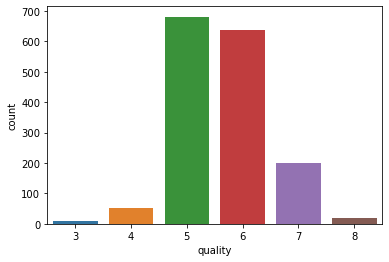

In [57]:
# quality distribution
sns.countplot(x='quality',data=df)


In [58]:
# if >5 then 1 else 0
df["quality"]=[1 if x>5 else 0 for x in df.quality]

In [59]:
x=df.drop(["quality"],axis=1)
y=df.quality

In [60]:
y.unique()

array([0, 1], dtype=int64)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [63]:
# fit_transform for train data
x_train=sc.fit_transform(x_train)

In [13]:
# svm
from sklearn.svm import SVC
model=SVC(random_state=1)

In [14]:
model.fit(x_train,y_train)


SVC(random_state=1)

In [15]:
model.score(x_train,y_train)

0.8021892103205629

In [64]:
x_test=sc.transform(x_test)

In [17]:
model.score(x_test,y_test)

0.771875

In [18]:
y_pred=model.predict(x_test)

In [65]:
# random forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=1)

In [66]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [67]:
# evaluate
y_pred=model.predict(x_test)


In [68]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.784375

In [69]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[106,  35],
       [ 34, 145]], dtype=int64)

<AxesSubplot:>

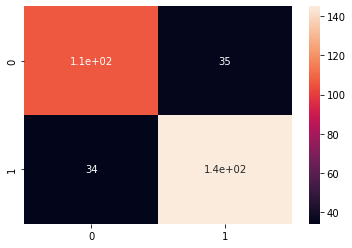

In [70]:
# visualize confusion matrix
sns.heatmap(cm,annot=True)


In [72]:
# confusion matrix using plotly
import plotly.figure_factory as ff
fig=ff.create_annotated_heatmap(cm,x=["0","1"],y=["0","1"])
fig.show()


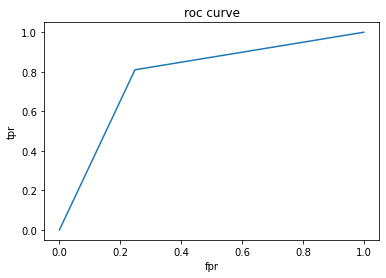

In [71]:
# plot roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc curve")
plt.show()


In [23]:
# export model random forest
import pickle
pickle.dump(model,open("model.pkl","wb"))

In [24]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=1)


In [25]:
model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [26]:
y_pred=model.predict(x_test)

In [27]:
# evaluate
accuracy_score(y_test,y_pred)

0.740625

In [28]:
# grid search
from sklearn.model_selection import GridSearchCV
model=SVC(random_state=1)


In [29]:
# parameters
parameters={"kernel":["linear","rbf"],"C":[0.1,1,10,100]}
grid_search=GridSearchCV(estimator=model,param_grid=parameters,scoring="accuracy",cv=10,n_jobs=-1)

grid_search.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [30]:
grid_search.best_score_

0.7709645669291338

In [31]:
# neural network tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(12,activation="relu",input_shape=[11]),
    layers.Dense(8,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
# early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor="val_loss",patience=50,verbose=1)
# test and train
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=250)



ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# export model as nn
model.save("nn_model.h5")



In [ ]:
# read data from csv and write some description of data

# Path: wine.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("winequality-red.csv")
df




# describe data
df.describe()

# info

df.info()

# unique values

